<a href="https://colab.research.google.com/github/SamoaChen/Modern_Control/blob/main/Modern_Control_HW2_Classical_Control_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install slycot

In [ ]:
pip install control

#*Figure 2.1 & 2.2*

Text(0.5, 1.0, 'Figure 2.1: Sinusoidal response')

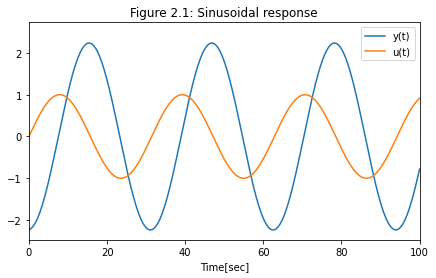

In [ ]:
#-----Import packages
import numpy as np
import matplotlib.pyplot as plt
from control.matlab import * # MATLAB-like control toolbox functionality

#-----Construct System
# Close all figures
plt.close('all')

# Define s
s = tf('s')

# Plant 
num_delay, den_delay = pade(2, n=10)
G_delay = tf(num_delay, den_delay)
G = 5 / (10*s + 1) * G_delay

# Input Sinusoid
w = 0.2
alpha = 0
t = np.linspace(-100,100,1000)
u = np.sin(w*t+alpha)

#------Plot figure 2.1
fig, ax = plt.subplots(figsize=(7,4))
yout, T, xout = lsim(G,u,t)

plt.plot(T,yout,label='y(t)')
plt.plot(t,u,label='u(t)')
plt.xlim(0,100)
plt.legend()

ax.set_xlabel('Time[sec]')
ax.set_title('Figure 2.1: Sinusoidal response')

##### Write Up
Shown by the graph above, at a driving frequency of 0.2 rad/s, the system amplifies the magnitude of the input sinusoidal function and responded with a delayed output. 

(0.001, 10)

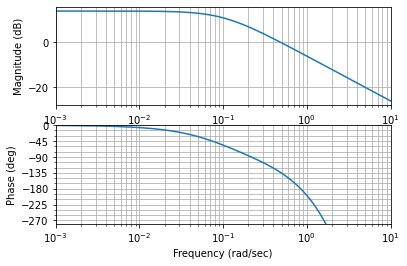

In [ ]:
#-----Plot 2.2 Bode Plot
fig,ax = plt.subplots()
omega = np.arange(1e-3,1e1,0.001)
mag, phase, omega = bode(G,omega)
plt.ylim(-280,0)
plt.xlim(1e-3,10)

##### Write Up
According to the bode plot above, when the input frequency increases, the responding magnitude decreases, and there is a turining point at around the first pole value, changing the slope from 0 to -20 dB/decade. The delay only influence the phase plot, but not the magnitude plot.

#*Example 2.1*

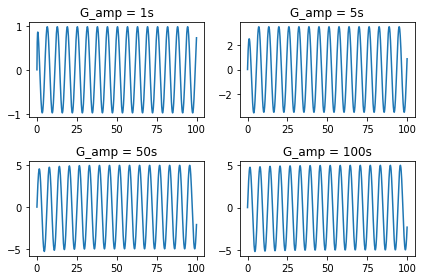

In [ ]:
#-----Example 2.1 Feedback Amplifier
# parameters
t = np.linspace(0,100,1000)
output = np.zeros((4, 1000))
amp_facs = np.array([1,5,50,100])
amp_size = 5

# Input function
amp = 1
u = amp*np.sin(t)

# plot responses
for index,num in enumerate(amp_facs):
  K_2 = 1/amp_size
  G_amp = num*s
  G = G_amp/(1+G_amp*K_2)
  yout, T, xout = lsim(G,u,t)
  output[index,:] = yout
# Input function
fig, axs = plt.subplots(2,2)
axs[0,0].plot(T,output[0,:])
axs[0,1].plot(T,output[1,:])
axs[1,0].plot(T,output[2,:])
axs[1,1].plot(T,output[3,:])
axs[0,0].set_title("G_amp = 1s")
axs[0,1].set_title("G_amp = 5s")
axs[1,0].set_title("G_amp = 50s")
axs[1,1].set_title("G_amp = 100s")
plt.tight_layout()

##### Write Up
When the gain of the amplifier increase(arbitrary amplifier tf used), the close loop transfer function can be approximated as the inverse of the gain on the feedback path. In the example above, the feedback gain is set to be 1/5, thus, when the amplifier gain increase, the magnitude of the response to a unit magnitude sinusoidal wave approaches 5, and as the book stated, achieved a gloabl linearization.

#*Example 2.2*

Text(0.5, 1.0, 'Figure 2.2: Effect of proportional gain Kc')

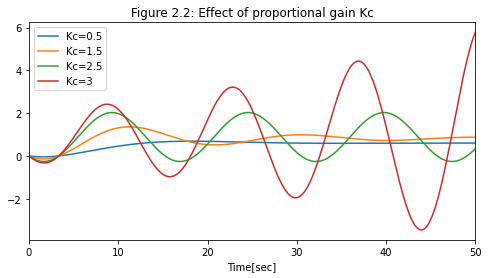

In [ ]:
#-----Example 2.2 Inverse Response Process
# parameters
t = np.linspace(0,50,1000)
output = np.zeros((4, 1000))
# Plant
G = 3*(-2*s+1)/(10*s+1)/(5*s+1)

# Closed Loop
Kc = np.array([0.5,1.5,2.5,3])
for index, num in enumerate(Kc):
  T = G*num/(1+G*num)
  yout, T = step(T, t)
  output[index,:] = yout

#------Plot figure 2.6
fig, ax = plt.subplots(figsize=(8,4))

plt.plot(t,output[0,:],label='Kc=0.5')
plt.plot(t,output[1,:],label='Kc=1.5')
plt.plot(t,output[2,:],label='Kc=2.5')
plt.plot(t,output[3,:],label='Kc=3')
plt.xlim(0,50)
plt.legend()

ax.set_xlabel('Time[sec]')
ax.set_title('Figure 2.2: Effect of proportional gain Kc')

##### Write Up
The graph aboves shows that too large of a proportional control gain will make the system unstable. And the system can be stabalized by lowring the gain of the controller.

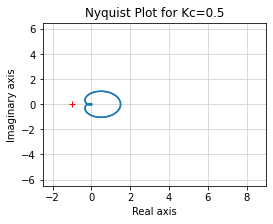

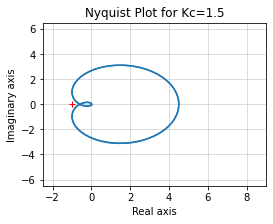

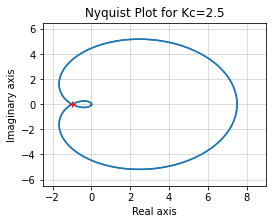

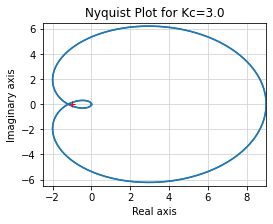

In [ ]:
# Plot Nyquist Plots
# parameters
omega = np.arange(-100,100,0.001)
real_vec = np.zeros((4, omega.size))
imag_vec = np.zeros((4, omega.size))

for index,num in enumerate(Kc):
  L = G*num
  fig, ax = plt.subplots(figsize=(4,3))
  real, imag, freq = nyquist(L,omega)
  plt.xlim(-2.5,9)
  plt.ylim(-6.5,6.5)
  ax.set_title('Nyquist Plot for Kc=%1.1f'%num)
  plt.show()

##### Write Up
Based on the Nyquist criteria, the Nyquist plot for Kc=0.5 has 0 loop enclosure of point -1, and there is 0 open loop RHP poles,thus we can say that there is no close loop RHP poles, thus the system is stable. The same analysis is true for the second Nyquist plot for Kc=1.5. The third Nyquist plot goes through the point -1, indicating that the close loop poles are on the imaginary axes. The forth Nyquist plot encircles -1 twice in the clock-wise direction, thus, we have two RHP closed loop poles. The system is unstable.

#*Figure 2.7*

The gain margin is 2.5


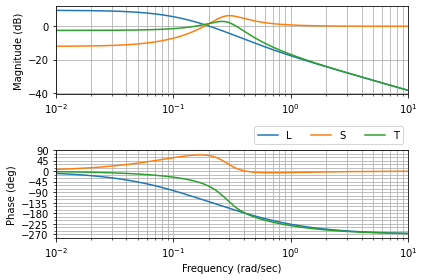

In [ ]:
#-----Figure 2.7 Bode Plots for L, T, and S
# Plant
G = 3*(-2*s+1)/(10*s+1)/(5*s+1)
# Controller
Kc = 1
# Transfer Functions
L = Kc*G
T = G*Kc/(1+G*Kc)
S = 1 - T

# Plot 2.7 Bode Plot
fig,ax = plt.subplots()
omega = np.logspace(-2, 1, 1000)
# mag, phase, omega = bode(sys,omega)
mag, phase, omega = bode(L, omega)
magS, phaseS, omega = bode(S, omega)
magT, phaseT, omega = bode(T, omega)
plt.legend(["L", "S", "T"],bbox_to_anchor=(0, 1.01, 1, 0), loc=4, ncol=3)
plt.xlim(1e-2,10)
plt.tight_layout()
plt.show

# Calculate the margins
gm, pm, wg, wp = margin(L)
print('The gain margin is %1.1f'%gm)

##### Write Up
The bode plots for L,S,T are plotted above. The gain margin for L is calculated. The value is 2.5, which means the Kc values need to increase by more than 2.5 times to make the system unstable. An visual explanation is that the magnitude plot need to increase by more than 2.5 times to shift the point that corresponds to a phase of -180 to above 0.